In [9]:
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn. preprocessing import LabelBinarizer
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense , Dropout , MaxPool2D , InputLayer , Flatten , Conv2D
import cv2 as cv

In [1]:
import tensorflow as tf
import keras
print(tf.__version__)
print(keras.__version__)

2.17.0
3.6.0


In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
train_dir = os.path.join(os.getcwd(),r'train')
test_dir = os.path.join(os.getcwd(),r'test')
x_train = []
y_train = []
x_test = []
y_test = []
categories = ['benign','malignant']


In [3]:
train_dir

'd:\\Ai_code\\Deep Learning\\Projects\\Skin Cancer\\train'

In [4]:
for category in categories:
    path = os.path.join(train_dir,category)
    for img in os.listdir(path):
        img_path = os.path.join(path,img)
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image,(64,64))
        image = image / 255
        x_train.append(image)
        y_train.append(category)

In [5]:
size = []

for cat in categories :
    path = os.path.join(train_dir,cat)
    for img in os.listdir(path):
        size.append(image.shape)
pd.Series(size).value_counts()

(64, 64, 3)    2637
Name: count, dtype: int64

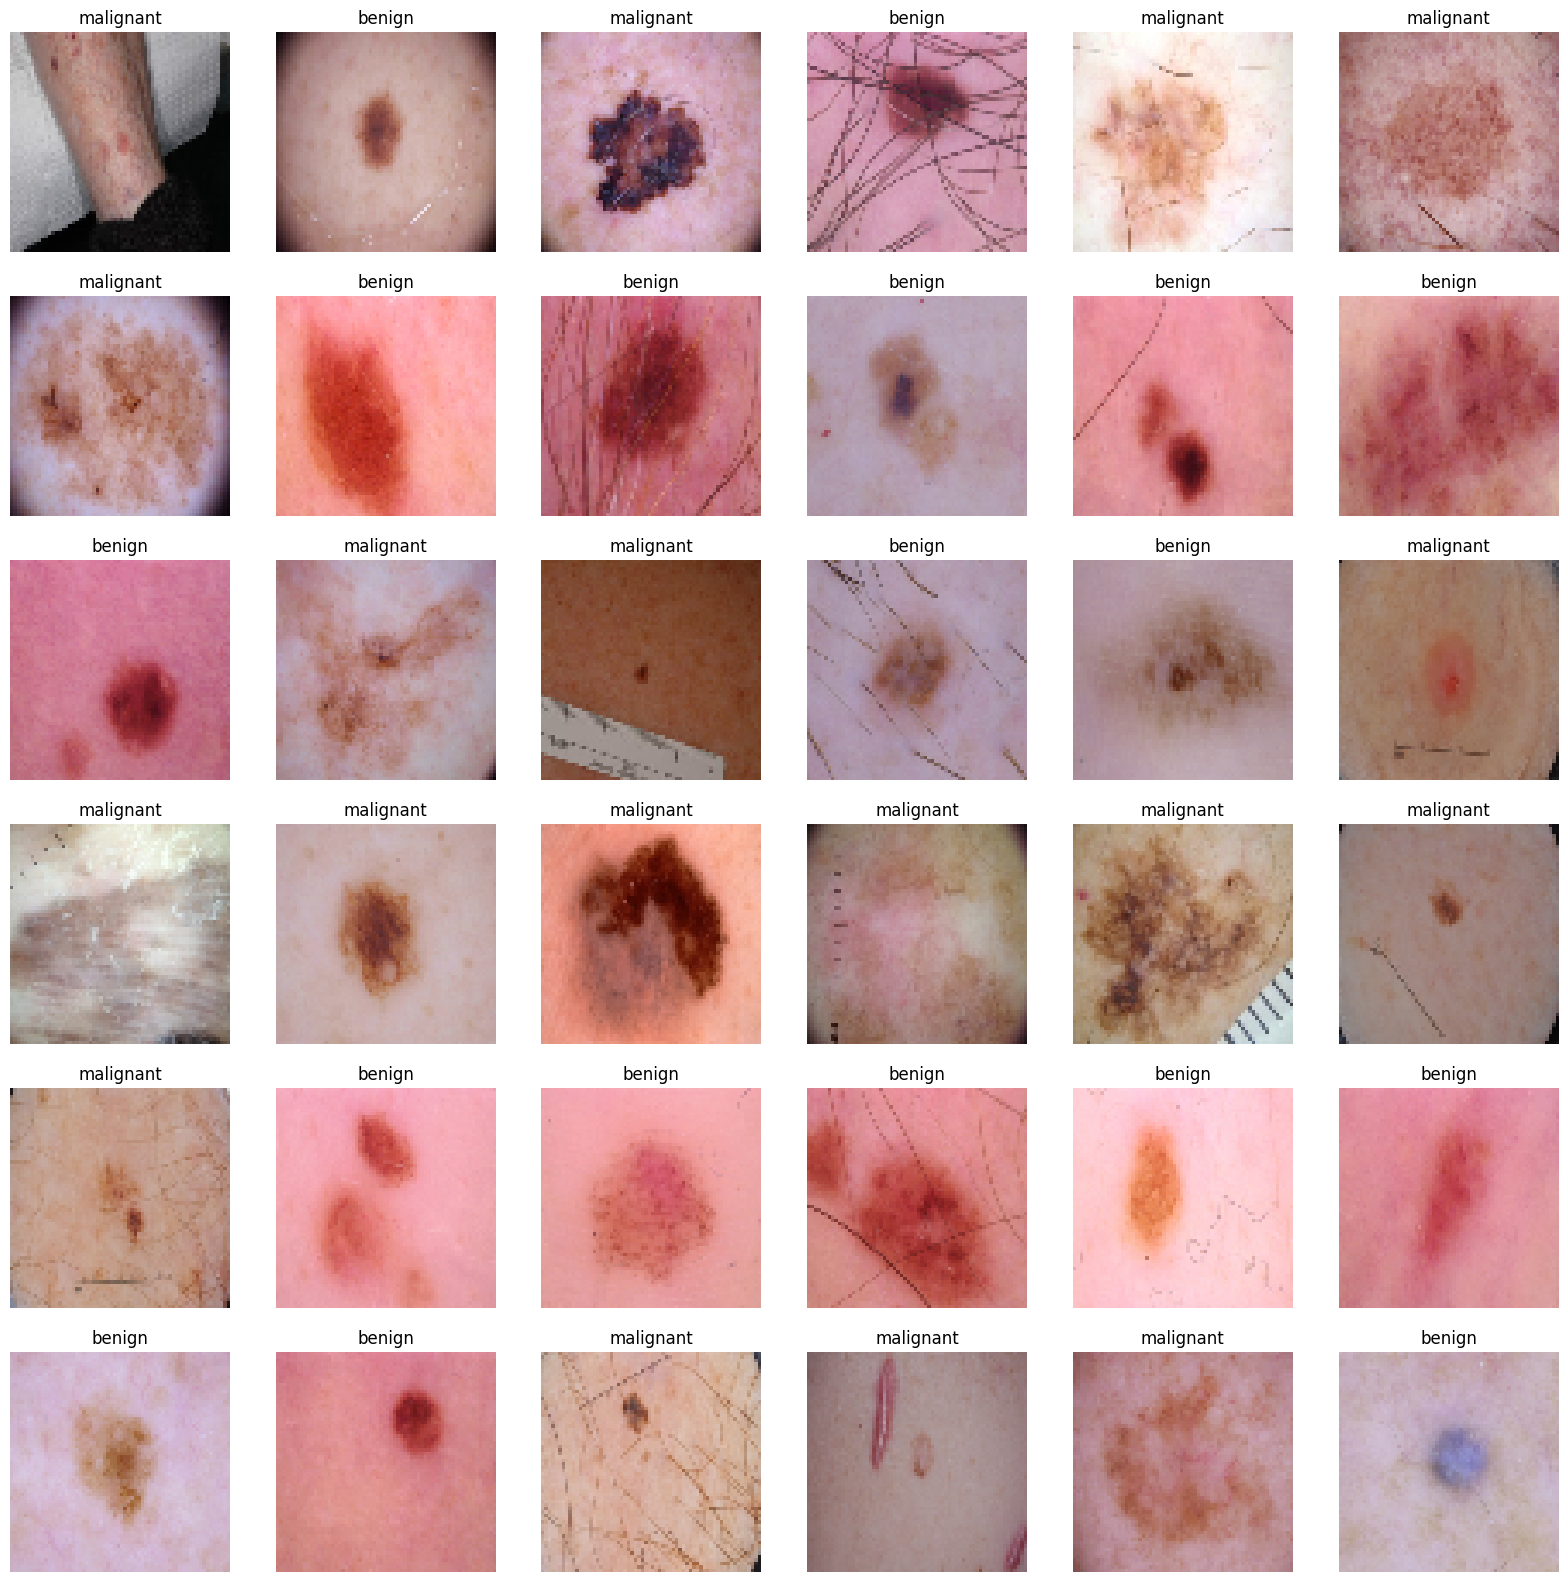

In [7]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(x_train),36))) :
    plt.subplot(6,6,n+1)
    plt.imshow(x_train[i])
    plt.axis('off')
    plt.title(y_train[i])

In [8]:
for category in categories:
    path = os.path.join(test_dir,category)
    for img in os.listdir(path):
        img_path = os.path.join(path,img)
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image,(64,64))
        image = image / 255
        x_test.append(image)
        y_test.append(category)

In [9]:
size = []

for cat in categories :
    path = os.path.join(test_dir,cat)
    for img in os.listdir(path):
        size.append(image.shape)
pd.Series(size).value_counts()

(64, 64, 3)    660
Name: count, dtype: int64

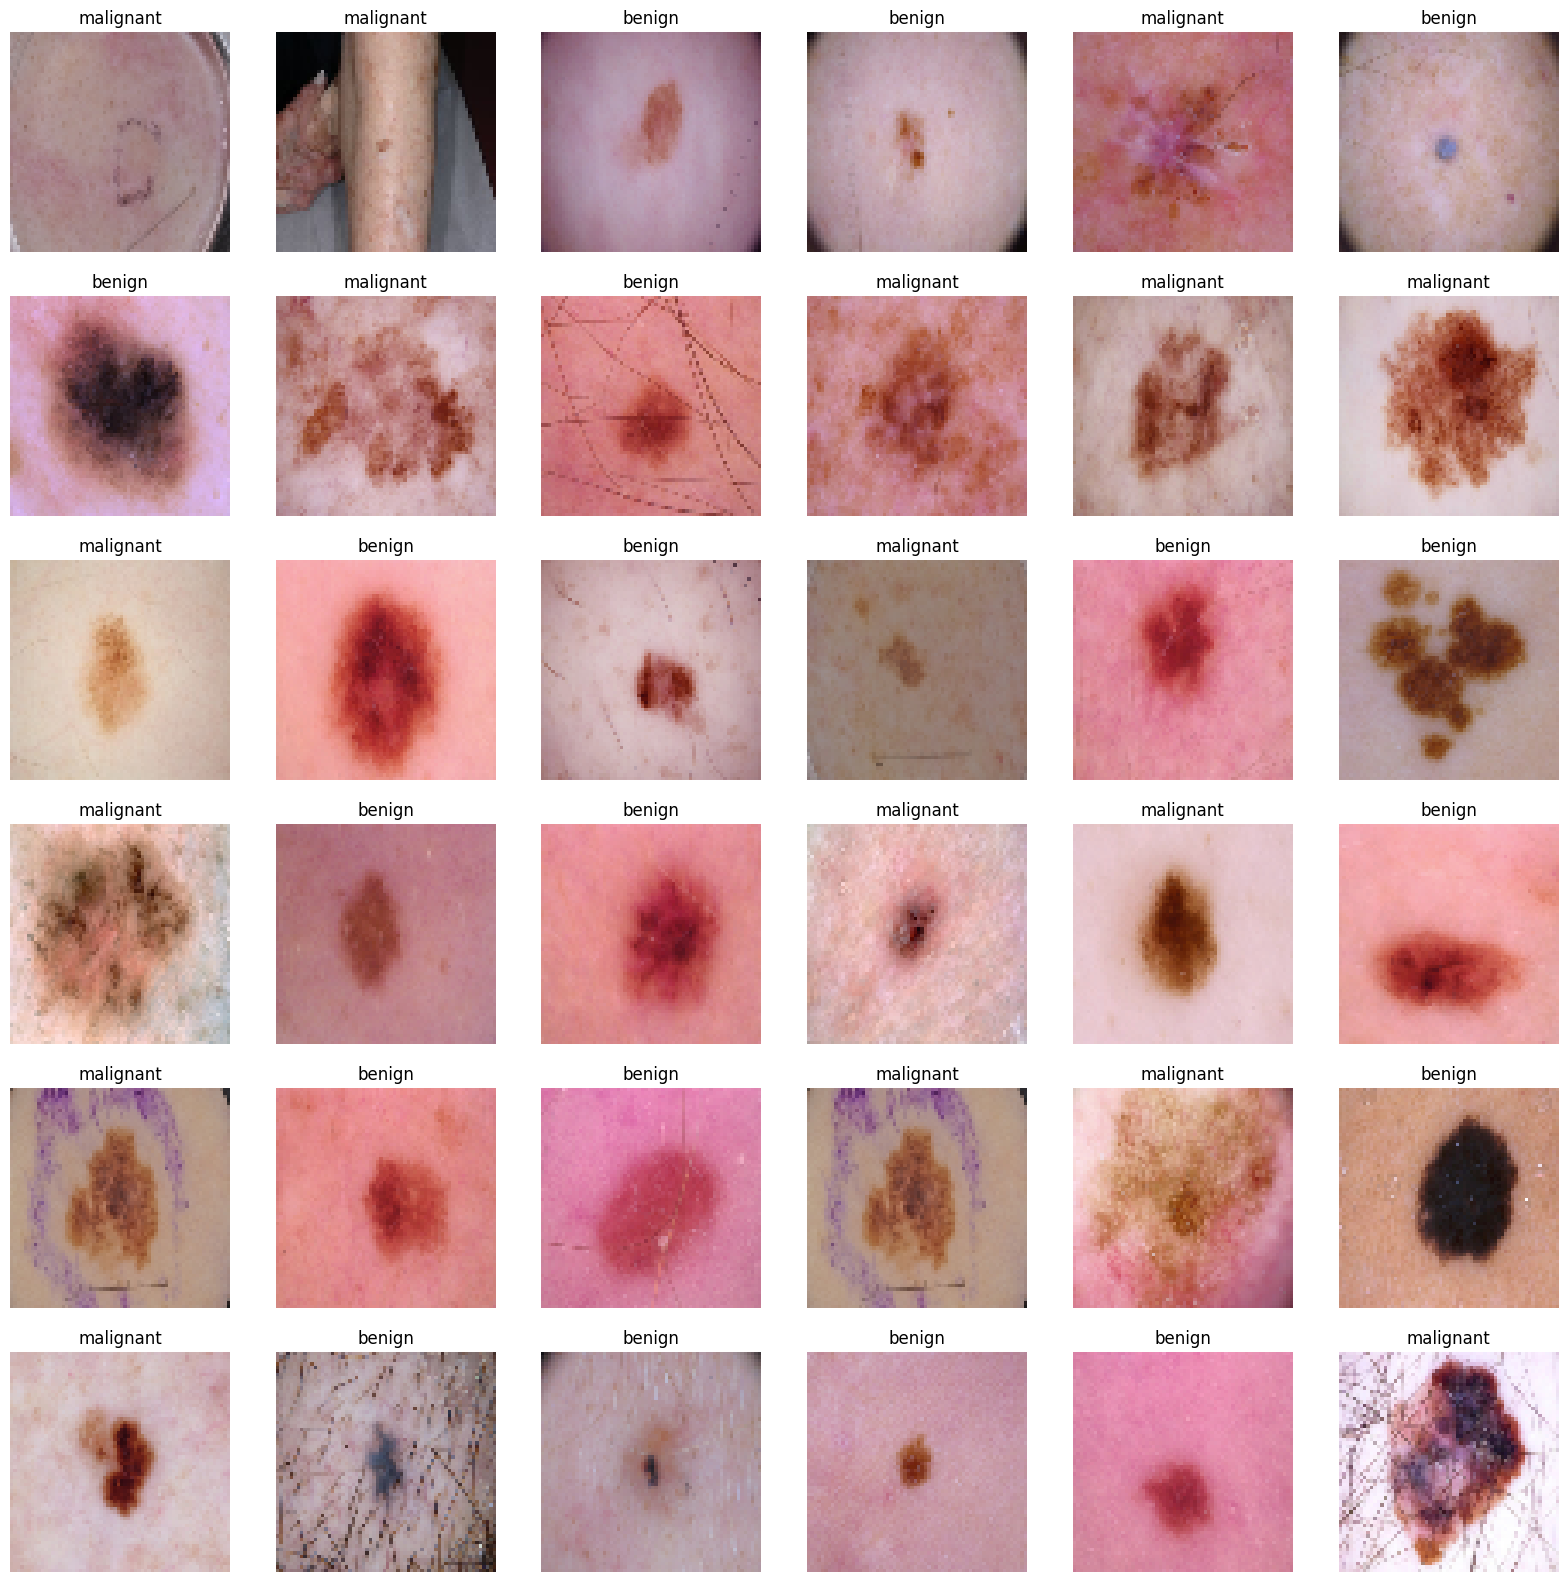

In [10]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(x_test),36))) :
    plt.subplot(6,6,n+1)
    plt.imshow(x_test[i])
    plt.axis('off')
    plt.title(y_test[i])

# Building The Model

In [11]:
lb=LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_train = to_categorical(y_train, num_classes=2)
y_test = lb.fit_transform (y_test)
y_test = to_categorical(y_test, num_classes=2)

In [12]:
x_train = np.array(x_train, dtype='float32')
y_train = np.array(y_train, dtype='float32')
x_test = np.array(x_test, dtype='float32')
y_test = np.array(y_test, dtype='float32')

In [13]:
model = Sequential([
    Conv2D(32,kernel_size=(2,2),activation='relu',input_shape=(64,64,3)),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(64,kernel_size=(2,2),activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(128,kernel_size=(2,2),activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(.2),
    Dense(64,activation='relu'),
    Dropout(.2),
    Dense(2,activation='softmax')
])


C:\Users\omar\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [59]:
# model.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [14]:
print('Model Details are : ')
print(model.summary())

Model Details are : 


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 63, 63, 32)     │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 128)    │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 852,898 (3.25 MB)

 Trainable params: 852,898 (3.25 MB)

 Non-trainable params: 0 (0.00 B)

None


In [15]:
Batch_Size = 32
INIT_LR = 1e-4
EPOCHES = 50
from keras.optimizers import Adam
opt = Adam(learning_rate=INIT_LR,weight_decay=INIT_LR/Batch_Size)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
x_train.shape,x_test.shape

((2637, 64, 64, 3), (660, 64, 64, 3))

In [17]:
model1 = model.fit(
    x_train,
    y_train,
    epochs=51,
    batch_size=64,
    validation_data=(x_test,y_test)
)


Epoch 1/51
42/42 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - accuracy: 0.5658 - loss: 0.6709 - val_accuracy: 0.7258 - val_loss: 0.6187
Epoch 2/51
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - accuracy: 0.6991 - loss: 0.5994 - val_accuracy: 0.7667 - val_loss: 0.5588
Epoch 3/51
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.7302 - loss: 0.5336 - val_accuracy: 0.7909 - val_loss: 0.4647
Epoch 4/51
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 0.7611 - loss: 0.4945 - val_accuracy: 0.7879 - val_loss: 0.4284
Epoch 5/51
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.8013 - loss: 0.4344 - val_accuracy: 0.8000 - val_loss: 0.4148
Epoch 6/51
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.7970 - loss: 0.4350 - val_accuracy: 0.7864 - val_loss: 0.3970
Epoch 7/51
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.8201 - loss: 0.3876 - val_accuracy: 0.7924 - val_loss: 0.3903
Epoch 8/51
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 0.8187 - loss: 0.3899 - val_accuracy: 0.8076 - v

In [66]:
model.save('skin_cancer_CNN.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [35]:
import tensorflow as tf

# Load the entire model
model = tf.keras.models.load_model('skin_cancer_CNN.h5')

# Check the model summary
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 63, 63, 32)        416       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 31, 31, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 30, 30, 64)        8256      
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 15, 15, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 14, 14, 128)       32896     
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 7, 7, 128)        

In [48]:
import os
import cv2
import numpy as np
import tensorflow as tf

def preprocess_image(img_path):

    image = cv2.imread(img_path)
    image = cv2.resize(image, (64, 64))
    image = image / 255.0
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image


In [53]:

def preprocess_image(img_path):

    image = cv2.imread(img_path)
    image = cv2.resize(image, (64, 64))
    image = image / 255.0
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

def load_model(model_path):

    model = tf.keras.models.load_model(model_path)
    return model

def predict_category(model, img_path, categories):

    image = preprocess_image(img_path)
    prediction = model.predict(image)
    predicted_class = np.argmax(prediction, axis=1)[0]
    confidence_score = np.max(prediction)
    return categories[predicted_class], confidence_score

categories = ['benign', 'malignant']

# Load the model
model = load_model('skin_cancer_CNN.h5')

# Predict the category for a given image
img_path = r'C:\Users\omar\Ai\Deep Learning\Projects\Skin Cancer\train\benign\50.jpg'
predicted_category, confidence_score = predict_category(model, img_path, categories)
print(f'The predicted category is: {predicted_category} with a confidence score of {confidence_score:.2f}')


1/1 [==============================] - 0s 74ms/step
The predicted category is: benign with a confidence score of 0.82


## ============================== Transfer Learning ==============================

In [1]:
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import pandas as pd
from sklearn. preprocessing import LabelBinarizer



In [2]:
train_path = 'train'
test_path = 'test'

In [33]:
# train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=train_path, target_size=(224,224), batch_size=10)
# test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

In [11]:
# import os
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.utils import Sequence

# class SafeImageDataGenerator(Sequence):
#     def __init__(self, generator):
#         self.generator = generator
#         self.samples = len(generator)

#     def __len__(self):
#         return len(self.generator)

#     def __getitem__(self, idx):
#         while True:
#             try:
#                 batch = self.generator[idx]
#                 return batch
#             except OSError:
#                 print(f"Skipping corrupted file at index {idx}")
#                 idx += 1

# # Define your directories and categories
# train_dir = 'train'
# categories = ['benign','malignant']  # Replace with actual categories

# # Create an ImageDataGenerator for training and validation
# train_datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=40,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

# test_datagen = ImageDataGenerator(rescale=1./255)

# # Create generators
# train_generator = train_datagen.flow_from_directory(
#     train_dir,
#     target_size=(224, 224),
#     batch_size=32,
#     class_mode='binary'
# )

# validation_generator = test_datagen.flow_from_directory(
#     'test',
#     target_size=(224, 224),
#     batch_size=32,
#     class_mode='binary'
# )

# # Wrap the generators with SafeImageDataGenerator
# train_generator_safe = SafeImageDataGenerator(train_generator)
# validation_generator_safe = SafeImageDataGenerator(validation_generator)


In [3]:
train_dir = os.path.join(os.getcwd(),r'train')
test_dir = os.path.join(os.getcwd(),r'test')
x_train = []
y_train = []
x_test = []
y_test = []
categories = ['benign','malignant']


In [4]:
for category in categories:
    path = os.path.join(train_dir,category)
    for img in os.listdir(path):
        img_path = os.path.join(path,img)
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image,(224,224))
        image = image / 255
        x_train.append(image)
        y_train.append(category)

In [5]:
size = []

for cat in categories :
    path = os.path.join(train_dir,cat)
    for img in os.listdir(path):
        size.append(image.shape)
pd.Series(size).value_counts()

(224, 224, 3)    2637
Name: count, dtype: int64

In [6]:
for category in categories:
    path = os.path.join(test_dir,category)
    for img in os.listdir(path):
        img_path = os.path.join(path,img)
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image,(224,224))
        image = image / 255
        x_test.append(image)
        y_test.append(category)

In [7]:
size = []

for cat in categories :
    path = os.path.join(test_dir,cat)
    for img in os.listdir(path):
        size.append(image.shape)
pd.Series(size).value_counts()

(224, 224, 3)    660
Name: count, dtype: int64

In [10]:
lb=LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_train = to_categorical(y_train, num_classes=2)
y_test = lb.fit_transform (y_test)
y_test = to_categorical(y_test, num_classes=2)

In [11]:
x_train = np.array(x_train, dtype='float32')
y_train = np.array(y_train, dtype='float32')
x_test = np.array(x_test, dtype='float32')
y_test = np.array(y_test, dtype='float32')

In [12]:
mobile_net = tf.keras.applications.mobilenet.MobileNet()

In [13]:
model = keras.Sequential()

for layer in mobile_net.layers[:-1]:
    model.add(layer)

In [14]:
for layer in model.layers:
    layer.trainable = False

In [15]:
model.add(keras.layers.Dense(2, activation='softmax'))

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
#
model = model.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=64,
    validation_data=(x_test,y_test)
)


Epoch 1/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.6641 - loss: 1.0127 - val_accuracy: 0.8076 - val_loss: 0.5428
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.7987 - loss: 0.4987 - val_accuracy: 0.8288 - val_loss: 0.4225
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 41s 970ms/step - accuracy: 0.8429 - loss: 0.3973 - val_accuracy: 0.8364 - val_loss: 0.3890
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 39s 935ms/step - accuracy: 0.8556 - loss: 0.3465 - val_accuracy: 0.8409 - val_loss: 0.3797
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 38s 899ms/step - accuracy: 0.8484 - loss: 0.3537 - val_accuracy: 0.8439 - val_loss: 0.3618
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.8659 - loss: 0.3161 - val_accuracy: 0.8333 - val_loss: 0.3517
Epoch 7/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.8903 - loss: 0.2846 - val_accuracy: 0.8470 - val_loss: 0.3616
Epoch 8/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.8792 - loss: 0.2883 - val_accuracy: 0.8379 - 

# =================================

In [34]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

# Load the InceptionV3 model pre-trained on ImageNet, excluding the top fully connected layers
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)  # Add dropout for regularization
predictions = Dense(2, activation='sigmoid')(x)  # Binary classification

# Define the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers to prevent them from being updated during training
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary to verify the architecture
# model.summary()


In [35]:
#
inception_model = model.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=64,
    validation_data=(x_test,y_test)
)


Epoch 1/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.6280 - loss: 1.0622 - val_accuracy: 0.7955 - val_loss: 0.4494
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.8075 - loss: 0.4280 - val_accuracy: 0.8273 - val_loss: 0.3965
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.8255 - loss: 0.3872 - val_accuracy: 0.8030 - val_loss: 0.4107
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.8479 - loss: 0.3546 - val_accuracy: 0.8136 - val_loss: 0.4037
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.8511 - loss: 0.3454 - val_accuracy: 0.8106 - val_loss: 0.3900
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.8318 - loss: 0.3523 - val_accuracy: 0.8227 - val_loss: 0.3812
Epoch 7/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.8803 - loss: 0.2892 - val_accuracy: 0.8076 - val_loss: 0.4091
Epoch 8/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.8422 - loss: 0.3303 - val_accuracy: 0.8167 - val_loss:

In [36]:
model.save('skin_cancer_InceptionV3_93_84.keras')

## prediction functions 

In [1]:
import numpy as np
import tensorflow as tf
from PIL import Image
import cv2
import datetime
import os
import cv2

In [ ]:

        
# Preprocessing functions
def preprocess_image(img):
    
    img = cv2.resize(image,(224,224))
    img = img / 255
    return img
    


In [16]:
# Model loading function with error handling
def load_model(model_path):
    try:
        return tf.keras.models.load_model(model_path)
    except Exception as e:
        print(f"Error loading model '{model_path}': {e}")
        return None
    
# Preprocessing functions


def predict_skin_cancer(image):
    model = load_model('skin_model.keras')
    if model is None:
        return "Error: Model could not be loaded"
    
    processed_img = preprocess_image(image)
    prediction = model.predict(processed_img)
    predicted_class = np.argmax(prediction, axis=1)[0]
    class_names = ['Benign', 'Malignant']
    prediction = class_names[predicted_class]
        
    result = {
        "Prediction": prediction,
        "Analysis Date": datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
        "Note": "This is an automated analysis and should be verified by a healthcare professional."
    }
    
    return result

In [18]:
img1 = cv2.imread("imags\skin_B.jpg")

img2 = cv2.imread("imags\skin_M.jpg")

predict_colon_cancer(img1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


{'Prediction': 'Benign',
 'Analysis Date': '2024-10-24 15:35:41',
 'Note': 'This is an automated analysis and should be verified by a healthcare professional.'}

# gui v1

In [ ]:
import gradio as gr
import numpy as np
import tensorflow as tf
from PIL import Image
import cv2
import datetime
import os

# Model loading function with error handling
def load_model(model_path):
    try:
        return tf.keras.models.load_model(model_path)
    except Exception as e:
        print(f"Error loading model '{model_path}': {e}")
        return None

# Preprocessing functions
def skin_preprocess(img):
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img,(224,224))
    img = img / 255
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    return img

def custom_preprocessing(img, img_shape):
    
    # Convert the PIL image to a NumPy array and then to BGR format
    img = np.array(img)  # Convert to NumPy array (RGB format)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)  # Convert RGB to BGR
    # Convert PIL Image to NumPy array
    img = cv2.resize(img, img_shape)  # Resize to model's expected input size
    # Normalize if necessary (uncomment if needed)
    # img = img / 255.0  # Uncomment if normalization is needed
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

def preprocessing(img, img_shape):
    # Keep as RGB
    img = np.array(img)
    img = cv2.resize(img, img_shape)  # Resize to model's expected input size
#    img = img / norm_fac  # Normalize
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Prediction functions for different cancer types
def predict_skin_cancer(image):
    model = load_model('skin_model.keras')
    if model is None:
        return "Error: Model could not be loaded"
    
    processed_img = skin_preprocess(image)
    prediction = model.predict(processed_img)
    predicted_class = np.argmax(prediction, axis=1)[0]
    class_names = ['Benign', 'Malignant']
    prediction = class_names[predicted_class]
        
    result = {
        "Prediction": prediction,
        "Analysis Date": datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
        "Note": "This is an automated analysis and should be verified by a healthcare professional."
    }
    
    return result

def predict_colon_cancer(image):
    model = load_model('colon_model.h5')
    if model is None:
        return "Error: Model could not be loaded"
    
    processed_img = custom_preprocessing(image, (256, 256))
    prediction = model.predict(processed_img)
    prediction = np.argmax(prediction, axis=1)[0]
    class_names = ['Colon adenocarcinoma', 'Colon benign tissue']
    prediction = class_names[prediction]
        
    result = {
        "Prediction": prediction,
        "Analysis Date": datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
        "Note": "This is an automated analysis and should be verified by a healthcare professional."
    }
    
    return result

def predict_leukemia(image):
    model = load_model('leukemia_model.h5')
    if model is None:
        return "Error: Model could not be loaded"
    
    processed_img = preprocessing(image, (224, 224))
    prediction = model.predict(processed_img)
    predicted_class = np.argmax(prediction, axis=1)[0]
    class_names = ['Benign', 'Malignant_Pre-B', 'Malignant_Pro-B', 'Malignant_early Pre-B']
    prediction = class_names[predicted_class]
    
    result = {
        "Prediction": prediction,
        "Analysis Date": datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
        "Note": "This is an automated analysis and should be verified by a healthcare professional."
    }
    
    return result


def predict_lung_cancer(image):
    model = load_model('lung_model.h5')
    if model is None:
        return "Error: Model could not be loaded"
    
    processed_img = custom_preprocessing(image, (256, 256))
    prediction = model.predict(processed_img)
    predicted_class = np.argmax(prediction, axis=1)[0]
    class_names = ['Lung adenocarcinoma', 'Lung benign tissue', 'Lung squamous cell carcinoma']
    prediction = class_names[predicted_class]
        
    result = {
        "Prediction": prediction,
        "Analysis Date": datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
        "Note": "This is an automated analysis and should be verified by a healthcare professional."
    }
    
    return result

# Create the Gradio interface
def create_cancer_detection_interface():
    # CSS styling
    css = """
    .gradio-container {
        font-family: 'Arial', sans-serif;
    }
    .prediction-label {
        font-size: 1.2em;
        font-weight: bold;
        margin-top: 1em;
    }
    """
    
    # Create tabs for different cancer types
    with gr.Blocks(css=css) as demo:
        gr.Markdown("# Cancer Detection App")
        gr.Markdown("Upload an image for analysis. Please consult healthcare professionals for accurate diagnosis.")
        
        with gr.Tabs():
            with gr.Tab("Skin Cancer"):
                with gr.Row():
                    with gr.Column():
                        skin_input = gr.Image(label="Upload Skin Image")
                        skin_button = gr.Button("Analyze Skin Image")
                    with gr.Column():
                        skin_output = gr.JSON(label="Analysis Results")
                skin_button.click(
                    predict_skin_cancer,
                    inputs=skin_input,
                    outputs=skin_output
                )
            
            with gr.Tab("Colon Cancer"):
                with gr.Row():
                    with gr.Column():
                        colon_input = gr.Image(label="Upload Colon Image")
                        colon_button = gr.Button("Analyze Colon Image")
                    with gr.Column():
                        colon_output = gr.JSON(label="Analysis Results")
                colon_button.click(
                    predict_colon_cancer,
                    inputs=colon_input,
                    outputs=colon_output
                )
            
            with gr.Tab("Leukemia"):
                with gr.Row():
                    with gr.Column():
                        leukemia_input = gr.Image(label="Upload Blood Sample Image")
                        leukemia_button = gr.Button("Analyze Blood Sample")
                    with gr.Column():
                        leukemia_output = gr.JSON(label="Analysis Results")
                leukemia_button.click(
                    predict_leukemia,
                    inputs=leukemia_input,
                    outputs=leukemia_output
                )
            
            with gr.Tab("Lung Cancer"):
                with gr.Row():
                    with gr.Column():
                        lung_input = gr.Image(label="Upload Lung Image")
                        lung_button = gr.Button("Analyze Lung Image")
                    with gr.Column():
                        lung_output = gr.JSON(label="Analysis Results")
                lung_button.click(
                    predict_lung_cancer,
                    inputs=lung_input,
                    outputs=lung_output
                )
        
        gr.Markdown("""
        ### Important Notes:
        - This is an automated analysis tool and should not be used as a substitute for professional medical diagnosis.
        - Please consult with healthcare professionals for accurate diagnosis and treatment options.
        - Save the analysis results for your records and discuss them with your doctor.
        """)
    
    return demo

# Launch the app
if __name__ == "__main__":
    demo = create_cancer_detection_interface()
    demo.launch(share=True)

In [ ]:
import gradio as gr
import numpy as np
import tensorflow as tf
from PIL import Image
import cv2
import datetime
import os

# Model loading function with error handling
def load_model(model_path):
    try:
        return tf.keras.models.load_model(model_path)
    except Exception as e:
        print(f"Error loading model '{model_path}': {e}")
        return None

# Preprocessing functions
def skin_preprocess(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img,(224,224))
    img = img / 255
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

def custom_preprocessing(img, img_shape):
    # Convert the PIL image to a NumPy array and then to BGR format
    img = np.array(img)  # Convert to NumPy array (RGB format)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)  # Convert RGB to BGR
    img = cv2.resize(img, img_shape)  # Resize to model's expected input size
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

def preprocessing(img, img_shape):
    # Keep as RGB
    img = np.array(img)
    img = cv2.resize(img, img_shape)  # Resize to model's expected input size
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Prediction functions for different cancer types
def predict_skin_cancer(image):
    model = load_model('skin_model.keras')
    if model is None:
        return "Error: Model could not be loaded"
    
    processed_img = skin_preprocess(image)
    prediction = model.predict(processed_img)
    predicted_class = np.argmax(prediction, axis=1)[0]
    class_names = ['Benign', 'Malignant']
    prediction = class_names[predicted_class]
    confidence = float(np.max(prediction)) * 100
        
    result = {
        "Prediction": prediction,
        "Confidence": f"{confidence:.2f}%",
        "Analysis Date": datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
        "Note": "This is an automated analysis and should be verified by a healthcare professional."
    }
    
    return result

def predict_colon_cancer(image):
    model = load_model('colon_model.h5')
    if model is None:
        return "Error: Model could not be loaded"
    
    processed_img = custom_preprocessing(image, (256, 256))
    prediction = model.predict(processed_img)
    predicted_class = np.argmax(prediction, axis=1)[0]
    class_names = ['Colon adenocarcinoma', 'Colon benign tissue']
    prediction = class_names[predicted_class]
    confidence = float(np.max(prediction)) * 100
        
    result = {
        "Prediction": prediction,
        "Confidence": f"{confidence:.2f}%",
        "Analysis Date": datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
        "Note": "This is an automated analysis and should be verified by a healthcare professional."
    }
    
    return result

def predict_leukemia(image):
    model = load_model('leukemia_model.h5')
    if model is None:
        return "Error: Model could not be loaded"
    
    processed_img = preprocessing(image, (224, 224))
    prediction = model.predict(processed_img)
    predicted_class = np.argmax(prediction, axis=1)[0]
    class_names = ['Benign', 'Malignant_Pre-B', 'Malignant_Pro-B', 'Malignant_early Pre-B']
    prediction = class_names[predicted_class]
    confidence = float(np.max(prediction)) * 100
    
    result = {
        "Prediction": prediction,
        "Confidence": f"{confidence:.2f}%",
        "Analysis Date": datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
        "Note": "This is an automated analysis and should be verified by a healthcare professional."
    }
    
    return result

def predict_lung_cancer(image):
    model = load_model('lung_model.h5')
    if model is None:
        return "Error: Model could not be loaded"
    
    processed_img = custom_preprocessing(image, (256, 256))
    prediction = model.predict(processed_img)
    predicted_class = np.argmax(prediction, axis=1)[0]
    class_names = ['Lung adenocarcinoma', 'Lung benign tissue', 'Lung squamous cell carcinoma']
    prediction = class_names[predicted_class]
    confidence = float(np.max(prediction)) * 100
        
    result = {
        "Prediction": prediction,
        "Confidence": f"{confidence:.2f}%",
        "Analysis Date": datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
        "Note": "This is an automated analysis and should be verified by a healthcare professional."
    }
    
    return result

def create_cancer_detection_interface():
    # Enhanced CSS styling with background and improved visuals
    css = """
    .gradio-container {
        font-family: 'Arial', sans-serif;
        background-image: url('file/back1.jpg');
        background-size: cover;
        background-attachment: fixed;
        background-position: center;
    }
    
    .container {
        background-color: rgba(255, 255, 255, 0.95);
        border-radius: 15px;
        padding: 20px;
        margin: 20px;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);
    }
    
    .results-container {
        background-color: #f8f9fa;
        border-radius: 10px;
        padding: 20px;
        margin-top: 15px;
        border-left: 5px solid #007bff;
        box-shadow: 0 2px 4px rgba(0, 0, 0, 0.05);
    }
    
    .prediction-label {
        font-size: 1.4em;
        font-weight: bold;
        color: #2c3e50;
        margin-bottom: 15px;
    }
    
    .confidence-label {
        font-size: 1.2em;
        color: #28a745;
        margin-bottom: 10px;
    }
    
    .date-label {
        color: #6c757d;
        font-size: 0.9em;
        margin-bottom: 10px;
    }
    
    .note-label {
        color: #dc3545;
        font-style: italic;
        margin-top: 15px;
        padding: 10px;
        background-color: rgba(220, 53, 69, 0.1);
        border-radius: 5px;
    }
    
    .tab-nav {
        background-color: rgba(255, 255, 255, 0.9);
        border-radius: 10px 10px 0 0;
    }
    
    .tabs {
        border: none;
        box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1);
    }
    """

    def format_results(result):
        """Format results in HTML for better visualization"""
        if isinstance(result, str):  # Handle error messages
            return f"""
            <div class="results-container" style="border-left-color: #dc3545;">
                <div class="prediction-label" style="color: #dc3545;">{result}</div>
            </div>
            """
            
        return f"""
        <div class="results-container">
            <div class="prediction-label">
                Prediction: {result["Prediction"]}
            </div>
            <div class="confidence-label">
                Confidence: {result["Confidence"]}
            </div>
            <div class="date-label">
                Analysis performed on: {result["Analysis Date"]}
            </div>
            <div class="note-label">
                {result["Note"]}
            </div>
        </div>
        """

    def process_uploaded_image(image):
        """Resize and process uploaded image for display"""
        if image is None:
            return None
        
        # Convert to PIL Image if needed
        if isinstance(image, np.ndarray):
            image = Image.fromarray(image)
            
        # Resize image while maintaining aspect ratio
        max_size = (400, 400)
        image.thumbnail(max_size, Image.Resampling.LANCZOS)
        return image

    # Create the interface with Gradio Blocks
    with gr.Blocks(css=css) as demo:
        with gr.Column(elem_classes="container"):
            gr.Markdown("# AI-Powered Cancer Detection System")
            gr.Markdown("Upload medical images for automated analysis. Please consult healthcare professionals for accurate diagnosis.")
            
            with gr.Tabs():
                # Skin Cancer Tab
                with gr.Tab("Skin Cancer"):
                    with gr.Row():
                        with gr.Column(scale=1):
                            skin_input = gr.Image(
                                label="Upload Skin Image",
                                type="numpy",
                                preprocessing_fn=process_uploaded_image
                            )
                            skin_button = gr.Button("Analyze Skin Image", variant="primary")
                        with gr.Column(scale=1):
                            skin_output = gr.HTML(label="Analysis Results")
                    skin_button.click(
                        lambda img: format_results(predict_skin_cancer(img)),
                        inputs=skin_input,
                        outputs=skin_output
                    )
                
                # Colon Cancer Tab
                with gr.Tab("Colon Cancer"):
                    with gr.Row():
                        with gr.Column(scale=1):
                            colon_input = gr.Image(
                                label="Upload Colon Image",
                                type="numpy",
                                preprocessing_fn=process_uploaded_image
                            )
                            colon_button = gr.Button("Analyze Colon Image", variant="primary")
                        with gr.Column(scale=1):
                            colon_output = gr.HTML(label="Analysis Results")
                    colon_button.click(
                        lambda img: format_results(predict_colon_cancer(img)),
                        inputs=colon_input,
                        outputs=colon_output
                    )
                
                # Leukemia Tab
                with gr.Tab("Leukemia"):
                    with gr.Row():
                        with gr.Column(scale=1):
                            leukemia_input = gr.Image(
                                label="Upload Blood Sample Image",
                                type="numpy",
                                preprocessing_fn=process_uploaded_image
                            )
                            leukemia_button = gr.Button("Analyze Blood Sample", variant="primary")
                        with gr.Column(scale=1):
                            leukemia_output = gr.HTML(label="Analysis Results")
                    leukemia_button.click(
                        lambda img: format_results(predict_leukemia(img)),
                        inputs=leukemia_input,
                        outputs=leukemia_output
                    )
                
                # Lung Cancer Tab
                with gr.Tab("Lung Cancer"):
                    with gr.Row():
                        with gr.Column(scale=1):
                            lung_input = gr.Image(
                                label="Upload Lung Image",
                                type="numpy",
                                preprocessing_fn=process_uploaded_image
                            )
                            lung_button = gr.Button("Analyze Lung Image", variant="primary")
                        with gr.Column(scale=1):
                            lung_output = gr.HTML(label="Analysis Results")
                    lung_button.click(
                        lambda img: format_results(predict_lung_cancer(img)),
                        inputs=lung_input,
                        outputs=lung_output
                    )
            
            gr.Markdown("""
            ### Important Notes:
            - This is an automated analysis tool and should not be used as a substitute for professional medical diagnosis.
            - Please consult with healthcare professionals for accurate diagnosis and treatment options.
            - Save the analysis results for your records and discuss them with your doctor.
            """)
    
    return demo

# Launch the app
if __name__ == "__main__":
    demo = create_cancer_detection_interface()
    demo.launch()

# version 3


In [ ]:
import gradio as gr
import numpy as np
import tensorflow as tf
from PIL import Image
import cv2
import datetime
import base64
from colorama import Fore, Style, init

# Initialize colorama for terminal output (if needed)
init(autoreset=True)

# Function to load model with error handling
def load_model(model_path):
    try:
        return tf.keras.models.load_model(model_path)
    except Exception as e:
        print(f"Error loading model '{model_path}': {e}")
        return None

# Preprocessing functions
def skin_preprocess(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))
    img = img / 255
    img = np.expand_dims(img, axis=0)
    return img

def custom_preprocessing(img, img_shape):
    img = np.array(img)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    img = cv2.resize(img, img_shape)
    img = np.expand_dims(img, axis=0)
    return img

def preprocessing(img, img_shape):
    img = np.array(img)
    img = cv2.resize(img, img_shape)
    img = np.expand_dims(img, axis=0)
    return img

# Prediction functions for different cancer types
def predict_skin_cancer(image):
    model = load_model('skin_model.keras')
    if model is None:
        return {"Error": "Model could not be loaded"}
    
    processed_img = skin_preprocess(image)
    prediction = model.predict(processed_img)
    predicted_class = np.argmax(prediction, axis=1)[0]
    class_names = ['Benign', 'Malignant']
    prediction_label = class_names[predicted_class]
        
    result = {
        "Prediction": prediction_label,
        "Analysis Date": datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
        "Note": "This is an automated analysis and should be verified by a healthcare professional."
    }
    
    # Creative output message
    print(Fore.YELLOW + f"📊 Skin Cancer Prediction: {Fore.GREEN}{prediction_label}")
    
    return result

def predict_colon_cancer(image):
    model = load_model('colon_model.h5')
    if model is None:
        return {"Error": "Model could not be loaded"}
    
    processed_img = custom_preprocessing(image, (256, 256))
    prediction = model.predict(processed_img)
    predicted_class = np.argmax(prediction, axis=1)[0]
    class_names = ['Colon adenocarcinoma', 'Colon benign tissue']
    prediction_label = class_names[predicted_class]
        
    result = {
        "Prediction": prediction_label,
        "Analysis Date": datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
        "Note": "This is an automated analysis and should be verified by a healthcare professional."
    }
    
    # Creative output message
    print(Fore.YELLOW + f"📊 Colon Cancer Prediction: {Fore.GREEN}{prediction_label}")
    
    return result

def predict_leukemia(image):
    model = load_model('leukemia_model.h5')
    if model is None:
        return {"Error": "Model could not be loaded"}
    
    processed_img = preprocessing(image, (224, 224))
    prediction = model.predict(processed_img)
    predicted_class = np.argmax(prediction, axis=1)[0]
    class_names = ['Benign', 'Malignant_Pre-B', 'Malignant_Pro-B', 'Malignant_early Pre-B']
    prediction_label = class_names[predicted_class]
    
    result = {
        "Prediction": prediction_label,
        "Analysis Date": datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
        "Note": "This is an automated analysis and should be verified by a healthcare professional."
    }
    
    # Creative output message
    print(Fore.YELLOW + f"📊 Leukemia Prediction: {Fore.GREEN}{prediction_label}")
    
    return result

def predict_lung_cancer(image):
    model = load_model('lung_model.h5')
    if model is None:
        return {"Error": "Model could not be loaded"}
    
    processed_img = custom_preprocessing(image, (256, 256))
    prediction = model.predict(processed_img)
    predicted_class = np.argmax(prediction, axis=1)[0]
    class_names = ['Lung adenocarcinoma', 'Lung benign tissue', 'Lung squamous cell carcinoma']
    prediction_label = class_names[predicted_class]
        
    result = {
        "Prediction": prediction_label,
        "Analysis Date": datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
        "Note": "This is an automated analysis and should be verified by a healthcare professional."
    }
    
    # Creative output message
    print(Fore.YELLOW + f"📊 Lung Cancer Prediction: {Fore.GREEN}{prediction_label}")
    
    return result

# Function to encode an image in base64
def encode_image_base64(image_path):
    with open(image_path, "rb") as img_file:
        return base64.b64encode(img_file.read()).decode('utf-8')

# Encode the background image
background_image_base64 = encode_image_base64("back2.jpg")

# Create the Gradio interface
def create_cancer_detection_interface():
    # CSS styling with base64 background image
    css = f"""
    .gradio-container {{
        font-family: 'Arial', sans-serif;
        background-image: url('data:image/jpg;base64,{background_image_base64}');  
        background-size: cover;
        background-position: center;
        color: white;
    }}
    .gr-tab, .gr-button, .gr-image, .gr-json {{
        background-color: rgba(0, 0, 0, 0.6);
        border-radius: 8px;
    }}
    .prediction-label {{
        font-size: 1.2em;
        font-weight: bold;
        margin-top: 1em;
    }}
    """
    
    # Create tabs for different cancer types
    with gr.Blocks(css=css) as demo:
        gr.Markdown("# 🎗️ Cancer Detection App")
        gr.Markdown("Upload an image for analysis. Please consult healthcare professionals for accurate diagnosis.")
        
        with gr.Tabs():
            with gr.Tab("Skin Cancer"):
                with gr.Row():
                    with gr.Column():
                        skin_input = gr.Image(label="Upload Skin Image")
                        skin_button = gr.Button("Analyze Skin Image")
                    with gr.Column():
                        skin_output = gr.JSON(label="Analysis Results")
                skin_button.click(
                    predict_skin_cancer,
                    inputs=skin_input,
                    outputs=skin_output
                )
            
            with gr.Tab("Colon Cancer"):
                with gr.Row():
                    with gr.Column():
                        colon_input = gr.Image(label="Upload Colon Image")
                        colon_button = gr.Button("Analyze Colon Image")
                    with gr.Column():
                        colon_output = gr.JSON(label="Analysis Results")
                colon_button.click(
                    predict_colon_cancer,
                    inputs=colon_input,
                    outputs=colon_output
                )
            
            with gr.Tab("Leukemia"):
                with gr.Row():
                    with gr.Column():
                        leukemia_input = gr.Image(label="Upload Blood Sample Image")
                        leukemia_button = gr.Button("Analyze Blood Sample")
                    with gr.Column():
                        leukemia_output = gr.JSON(label="Analysis Results")
                leukemia_button.click(
                    predict_leukemia,
                    inputs=leukemia_input,
                    outputs=leukemia_output
                )
            
            with gr.Tab("Lung Cancer"):
                with gr.Row():
                    with gr.Column():
                        lung_input = gr.Image(label="Upload Lung Image")
                        lung_button = gr.Button("Analyze Lung Image")
                    with gr.Column():
                        lung_output = gr.JSON(label="Analysis Results")
                lung_button.click(
                    predict_lung_cancer,
                    inputs=lung_input,
                    outputs=lung_output
                )
        
        gr.Markdown("""### Important Notes:
        - This is an automated analysis tool and should not be used as a substitute for professional medical diagnosis.
        - Please consult with healthcare professionals for accurate diagnosis and treatment options.
        - Save the analysis results for your records and discuss them with your doctor.
        """)
    
    return demo

# Launch the app
if __name__ == "__main__":
    demo = create_cancer_detection_interface()
    demo.launch()


In [ ]:
import gradio as gr
import numpy as np
import tensorflow as tf
from PIL import Image
import cv2
import datetime
import base64
from colorama import Fore, Style, init

# Initialize colorama for terminal output (if needed)
init(autoreset=True)

# Function to load model with error handling
def load_model(model_path):
    try:
        return tf.keras.models.load_model(model_path)
    except Exception as e:
        print(f"Error loading model '{model_path}': {e}")
        return None

# Function to resize image if it's larger than a specific size
def resize_image_if_needed(img, max_size=(256, 256)):
    if img.shape[0] > max_size[0] or img.shape[1] > max_size[1]:
        return cv2.resize(img, max_size)
    return img

# Preprocessing functions
def skin_preprocess(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = resize_image_if_needed(img, (224, 224))
    img = img / 255
    img = np.expand_dims(img, axis=0)
    return img

def custom_preprocessing(img, img_shape):
    img = np.array(img)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    img = resize_image_if_needed(img, img_shape)
    img = np.expand_dims(img, axis=0)
    return img

def preprocessing(img, img_shape):
    img = np.array(img)
    img = resize_image_if_needed(img, img_shape)
    img = np.expand_dims(img, axis=0)
    return img

# Prediction functions for different cancer types
def predict_skin_cancer(image):
    model = load_model('skin_model.keras')
    if model is None:
        return {"Error": "Model could not be loaded"}
    
    processed_img = skin_preprocess(image)
    prediction = model.predict(processed_img)
    predicted_class = np.argmax(prediction, axis=1)[0]
    class_names = ['Benign', 'Malignant']
    prediction_label = class_names[predicted_class]
        
    result = {
        "Prediction": prediction_label,
        "Analysis Date": datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
        "Note": "This is an automated analysis and should be verified by a healthcare professional."
    }
    
    return result

def predict_colon_cancer(image):
    model = load_model('colon_model.h5')
    if model is None:
        return {"Error": "Model could not be loaded"}
    
    processed_img = custom_preprocessing(image, (256, 256))
    prediction = model.predict(processed_img)
    predicted_class = np.argmax(prediction, axis=1)[0]
    class_names = ['Colon adenocarcinoma', 'Colon benign tissue']
    prediction_label = class_names[predicted_class]
        
    result = {
        "Prediction": prediction_label,
        "Analysis Date": datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
        "Note": "This is an automated analysis and should be verified by a healthcare professional."
    }
    
    return result

def predict_leukemia(image):
    model = load_model('leukemia_model.h5')
    if model is None:
        return {"Error": "Model could not be loaded"}
    
    processed_img = preprocessing(image, (224, 224))
    prediction = model.predict(processed_img)
    predicted_class = np.argmax(prediction, axis=1)[0]
    class_names = ['Benign', 'Malignant_Pre-B', 'Malignant_Pro-B', 'Malignant_early Pre-B']
    prediction_label = class_names[predicted_class]
    
    result = {
        "Prediction": prediction_label,
        "Analysis Date": datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
        "Note": "This is an automated analysis and should be verified by a healthcare professional."
    }
    
    return result

def predict_lung_cancer(image):
    model = load_model('lung_model.h5')
    if model is None:
        return {"Error": "Model could not be loaded"}
    
    processed_img = custom_preprocessing(image, (256, 256))
    prediction = model.predict(processed_img)
    predicted_class = np.argmax(prediction, axis=1)[0]
    class_names = ['Lung adenocarcinoma', 'Lung benign tissue', 'Lung squamous cell carcinoma']
    prediction_label = class_names[predicted_class]
        
    result = {
        "Prediction": prediction_label,
        "Analysis Date": datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
        "Note": "This is an automated analysis and should be verified by a healthcare professional."
    }
    
    return result

# Function to encode an image in base64
def encode_image_base64(image_path):
    with open(image_path, "rb") as img_file:
        return base64.b64encode(img_file.read()).decode('utf-8')

# Encode the background image
background_image_base64 = encode_image_base64("back2.jpg")

# Create the Gradio interface
def create_cancer_detection_interface():
    # CSS styling with base64 background image
    css = f"""
    .gradio-container {{
        font-family: 'Arial', sans-serif;
        background-image: url('data:image/jpg;base64,{background_image_base64}');  
        background-size: cover;
        background-position: center;
        color: white;
    }}
    .gr-tab, .gr-button, .gr-image, .gr-json {{
        background-color: rgba(0, 0, 0, 0.6);
        border-radius: 8px;
    }}
    .prediction-label {{
        font-size: 1.2em;
        font-weight: bold;
        margin-top: 1em;
    }}
    """
    
    # Create tabs for different cancer types
    with gr.Blocks(css=css) as demo:
        gr.Markdown("# 🎗️ Cancer Detection App")
        gr.Markdown("Upload an image for analysis. Please consult healthcare professionals for accurate diagnosis.")
        
        with gr.Tabs():
            with gr.Tab("Skin Cancer"):
                with gr.Row():
                    with gr.Column():
                        skin_input = gr.Image(label="Upload Skin Image")
                        skin_button = gr.Button("Analyze Skin Image")
                    with gr.Column():
                        skin_output = gr.JSON(label="Analysis Results")
                skin_button.click(
                    predict_skin_cancer,
                    inputs=skin_input,
                    outputs=skin_output
                )
            
            with gr.Tab("Colon Cancer"):
                with gr.Row():
                    with gr.Column():
                        colon_input = gr.Image(label="Upload Colon Image")
                        colon_button = gr.Button("Analyze Colon Image")
                    with gr.Column():
                        colon_output = gr.JSON(label="Analysis Results")
                colon_button.click(
                    predict_colon_cancer,
                    inputs=colon_input,
                    outputs=colon_output
                )
            
            with gr.Tab("Leukemia"):
                with gr.Row():
                    with gr.Column():
                        leukemia_input = gr.Image(label="Upload Blood Sample Image")
                        leukemia_button = gr.Button("Analyze Blood Sample")
                    with gr.Column():
                        leukemia_output = gr.JSON(label="Analysis Results")
                leukemia_button.click(
                    predict_leukemia,
                    inputs=leukemia_input,
                    outputs=leukemia_output
                )
            
            with gr.Tab("Lung Cancer"):
                with gr.Row():
                    with gr.Column():
                        lung_input = gr.Image(label="Upload Lung Image")
                        lung_button = gr.Button("Analyze Lung Image")
                    with gr.Column():
                        lung_output = gr.JSON(label="Analysis Results")
                lung_button.click(
                    predict_lung_cancer,
                    inputs=lung_input,
                    outputs=lung_output
                )
        
        gr.Markdown("""### Important Notes:
        - This is an automated analysis tool and should not be used as a substitute for professional medical diagnosis.
        - Please consult with healthcare professionals for accurate diagnosis and treatment options.
        - Save the analysis results for your records and discuss them with your doctor.
        """)
    
    return demo

# Launch the app
if __name__ == "__main__":
    demo = create_cancer_detection_interface()
    demo.launch(share=True)


In [ ]:
# Preprocessing functions
def skin_preprocess(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = resize_image_if_needed(img, (224, 224))
    img = img / 255
    img = np.expand_dims(img, axis=0)
    return img

def custom_preprocessing(img, img_shape):
    img = np.array(img)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    img = resize_image_if_needed(img, img_shape)
    img = np.expand_dims(img, axis=0)
    return img

def preprocessing(img, img_shape):
    img = np.array(img)
    img = resize_image_if_needed(img, img_shape)
    img = np.expand_dims(img, axis=0)
    return img


def preprocessing(img, img_shape):
    